In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

data = digits.data
target = digits.target

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

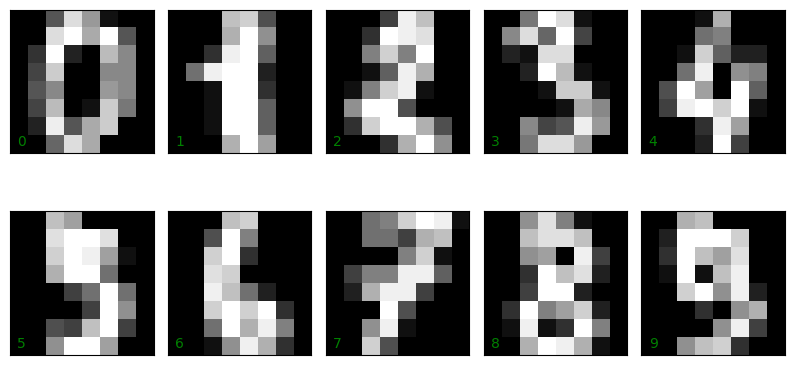

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green' if digits.target[i] == target[i] else 'red')

plt.show()

### SPLIT DATASET TO X AND Y

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


In [6]:
from sklearn.svm import SVC


svc_model = SVC()

svc_model.fit(x_train, y_train)

SVC()

In [7]:
y_pred = svc_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for SVC: {accuracy*100:2f}")

Accuracy for SVC: 98.611111


In [8]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for MLP: {accuracy*100:2f}")

Accuracy for MLP: 98.333333


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D



model = keras.models.Sequential()


model.add(Dense(units=784, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=80, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=2000, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
36/36 [==============================] - 5s 74ms/step - loss: 0.8976 - accuracy: 0.7058 - val_loss: 0.4225 - val_accuracy: 0.8681
Epoch 2/10
36/36 [==============================] - 2s 47ms/step - loss: 0.2578 - accuracy: 0.9199 - val_loss: 0.1689 - val_accuracy: 0.9514
Epoch 3/10
36/36 [==============================] - 2s 62ms/step - loss: 0.1651 - accuracy: 0.9521 - val_loss: 0.5494 - val_accuracy: 0.8715
Epoch 4/10
36/36 [==============================] - 1s 40ms/step - loss: 0.0972 - accuracy: 0.9774 - val_loss: 0.2072 - val_accuracy: 0.9410
Epoch 5/10
36/36 [==============================] - 1s 39ms/step - loss: 0.0898 - accuracy: 0.9704 - val_loss: 0.2382 - val_accuracy: 0.9236
Epoch 6/10
36/36 [==============================] - 1s 40ms/step - loss: 0.1270 - accuracy: 0.9626 - val_loss: 0.2904 - val_accuracy: 0.9271
Epoch 7/10
36/36 [==============================] - 2s 49ms/step - loss: 0.1078 - accuracy: 0.9652 - val_loss: 0.3496 - val_accuracy: 0.9306
Epoch 8/10
36

USINF CONVULUTIONAL NEURAL NETWORK

In [75]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))

model.add(layers.Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2048, activation='relu'))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))



In [77]:
x_train_reshaped = x_train.reshape((x_train.shape[0], 8, 8, 1))



model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 15s 244ms/step - loss: 0.2922 - accuracy: 0.9186
Epoch 2/15
45/45 [==============================] - 11s 243ms/step - loss: 0.1438 - accuracy: 0.9736
Epoch 3/15
45/45 [==============================] - 11s 241ms/step - loss: 0.2283 - accuracy: 0.9555
Epoch 4/15
45/45 [==============================] - 10s 222ms/step - loss: 0.1345 - accuracy: 0.9736
Epoch 5/15
45/45 [==============================] - 11s 242ms/step - loss: 0.2006 - accuracy: 0.9603
Epoch 6/15
45/45 [==============================] - 11s 244ms/step - loss: 0.1968 - accuracy: 0.9582
Epoch 7/15
45/45 [==============================] - 11s 241ms/step - loss: 0.0918 - accuracy: 0.9749
Epoch 8/15
45/45 [==============================] - 11s 241ms/step - loss: 0.1074 - accuracy: 0.9784
Epoch 9/15
45/45 [==============================] - 11s 241ms/step - loss: 0.5219 - accuracy: 0.8789
Epoch 10/15
45/45 [==============================] - 10s 225ms/step - loss: 0.1565 - accura

In [9]:
import joblib

In [10]:
model_filename = "euler_mnist.model"
joblib.dump(svc_model, model_filename)

['euler_mnist.model']

In [22]:
import numpy as np
from PIL import Image
import cv2 

image_path = "./test_images/3.jpeg"  # Replace with the path to your image
pil_image = Image.open(image_path)

image = np.array(pil_image)


gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


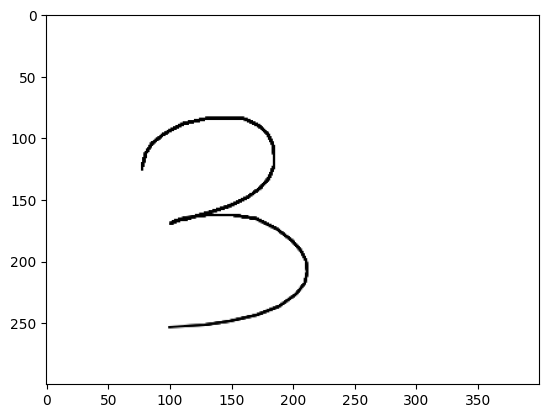

In [23]:
plt.imshow(image)

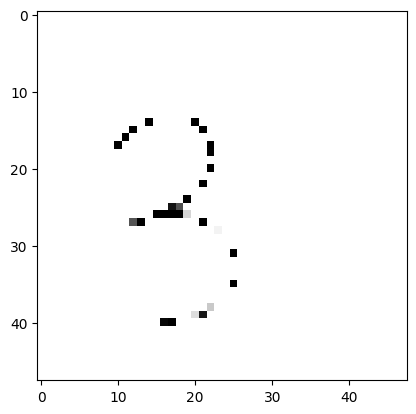

In [49]:
target_size = (48, 48)
pixelated_image = cv2.resize(image, target_size, interpolation=cv2.INTER_NEAREST)


plt.imshow(pixelated_image)